# Analog encoding of data

One important step that must be run at the beginning of many quantum algorithms, is loading and encoding data in such a way that the core algorithm can exploit quantum parallelism.

There are multiple ways to encode information, here we show the so-called analog encoding (refer to Mitarai, Kitagawa, Fujii, “Quantum Analog-Digital Conversion” https://arxiv.org/abs/1805.11250).

Let $N=2^n$. Suppose we want to load data $\left\{ y_j \right\}_{j=0}^N$; we assume they are normalized. The analog encoding unitary is an operator $U_A = U_A\left( \left\{ y_j \right\} \right)$ such that $U_A \left| 0 \right\rangle = \sum_j y_j \left| j \right\rangle$.


In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, execute

import matplotlib.pyplot as plt
import qiskit

In [2]:
y = np.random.rand(2**4)

The [Initialize command](https://qiskit.org/documentation/stubs/qiskit.extensions.Initialize.html) of Qiskit, performs such a task.

In [3]:
def generate_circuit(y):
    y_normal = y / np.linalg.norm(y)
    num_qubits = int(np.log2(len(y_normal)))
    
    qc = QuantumCircuit(num_qubits)
    init = qiskit.extensions.Initialize(y_normal)
    qc.append(init, [i for i in range(num_qubits)])
    
    return y_normal, qc, init

In [4]:
y_normal, qc, init = generate_circuit(y)

The normalized data that we want to load are:

In [5]:
y_normal

array([0.16996402, 0.00514422, 0.38935989, 0.25807943, 0.04303083,
       0.29995502, 0.3810003 , 0.06953384, 0.23067458, 0.19255023,
       0.24190006, 0.27220896, 0.09848624, 0.23110151, 0.36216834,
       0.30640781])

Indeed, we get them as the square root of the circuit measured output:

In [6]:
prob = execute(qc, backend = Aer.get_backend('statevector_simulator')).result().get_counts()
[np.sqrt(prob[j]) for j in prob]

[0.1699640219673946,
 0.00514421593442577,
 0.3893598922725927,
 0.2580794328200312,
 0.04303082550092433,
 0.29995501727994817,
 0.381000297681389,
 0.06953384321492664,
 0.23067457525263377,
 0.19255022957713397,
 0.24190006290914642,
 0.2722089579787539,
 0.09848624454506832,
 0.23110150549836536,
 0.3621683350820817,
 0.3064078090417344]

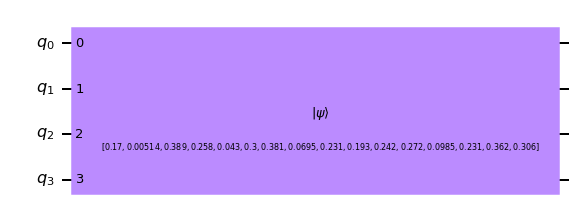

In [7]:
qc.draw()

We can transform the initialization into a reversible circuit through transpiling:

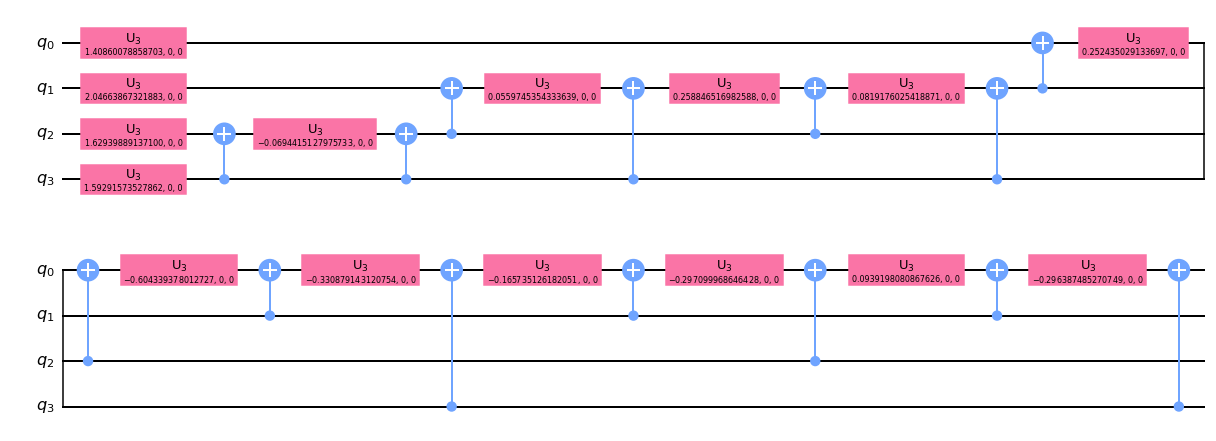

In [8]:
transpile(qc, basis_gates=['u3','cx']).draw()

The transpilation technique is based on multiplexors; refer to "Synthesis of Quantum Logic Circuits" Shende, Bullock, Markov https://arxiv.org/abs/quant-ph/0406176v5.
This can be made more explicit through a call to the `gates_to_uncompute()` function.

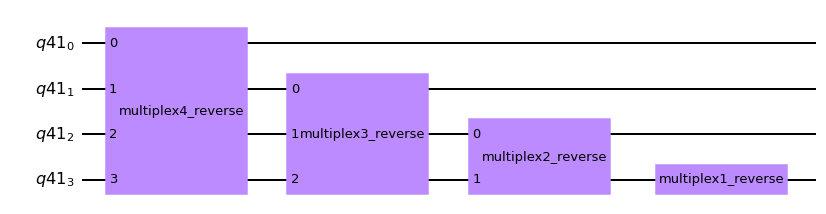

In [9]:
init.gates_to_uncompute().draw()

Circuit depth is known to scale linearly with $N$:

In [10]:
array_depth_init = []

for num_qubits in range(1,10):
    y = np.random.rand(2**num_qubits)
    y_normal, qc, init = generate_circuit(y)
    
    depth_init = transpile(qc, basis_gates=['u3','cx']).depth()
    array_depth_init.append(depth_init)
        
    print(f'num_qubits: {num_qubits}, depth_init: {depth_init}')

num_qubits: 1, depth_init: 1
num_qubits: 2, depth_init: 4
num_qubits: 3, depth_init: 11
num_qubits: 4, depth_init: 26
num_qubits: 5, depth_init: 57
num_qubits: 6, depth_init: 120
num_qubits: 7, depth_init: 247
num_qubits: 8, depth_init: 502
num_qubits: 9, depth_init: 1013


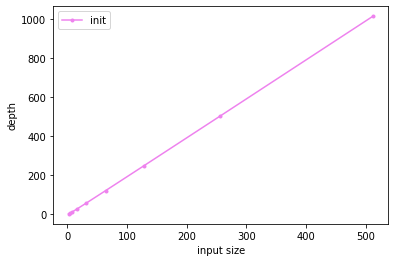

In [11]:
plt.plot([2**num_qubits for num_qubits in range(1,10)], array_depth_init, '.-', color='violet', label='init')
plt.legend(loc='best')
plt.xlabel('input size')
plt.ylabel('depth')
plt.show()

In [12]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright